# Install libs

https://github.com/nicknochnack/TensorflowKeras-ReinforcementLearning/blob/master/Deep%20Reinforcement%20Learning.ipynb

In [25]:
#!pip install tensorflow==2.3.0
#!pip install gym
#!pip install keras
#pip install keras-rl2
#!pip install pyglet

## DQN

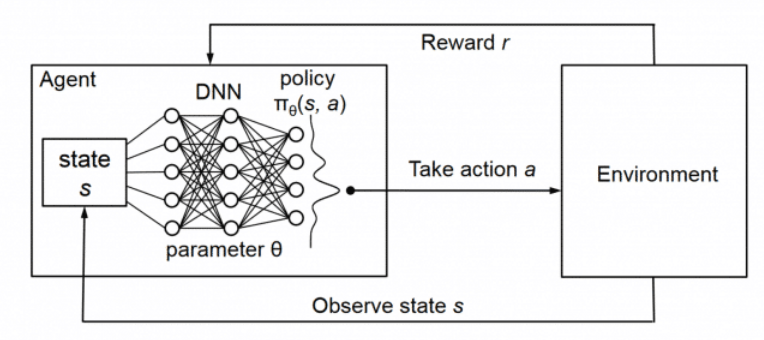
https://www.novatec-gmbh.de/wp-content/uploads/reinforcement_learning_loop-650x294.png

## Double DQN

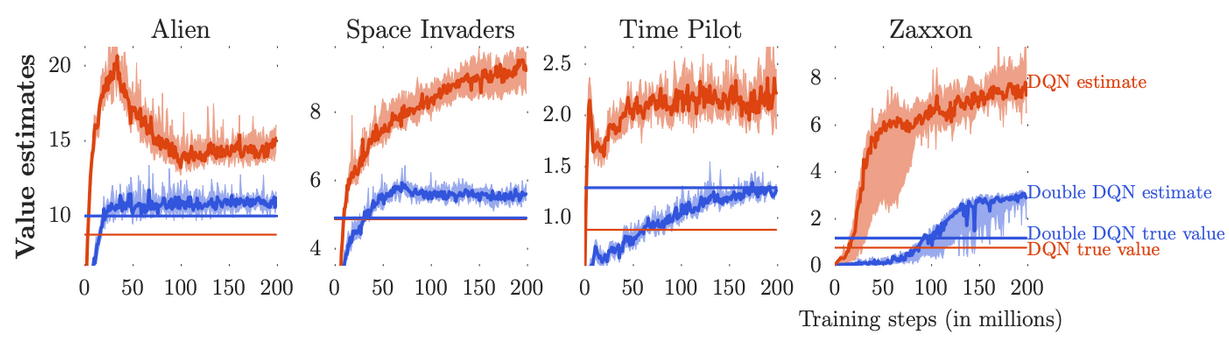

https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-03_at_2.22.18_PM.png



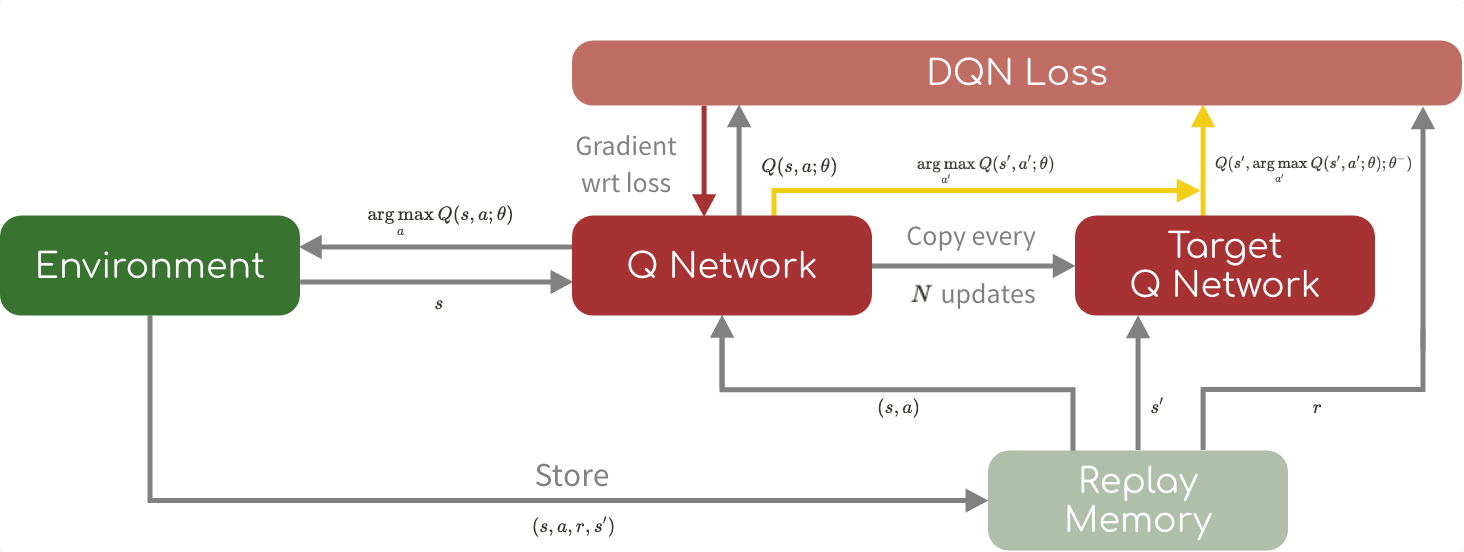
https://i.imgur.com/qkO3sOc.jpeg

## Dueling DQN

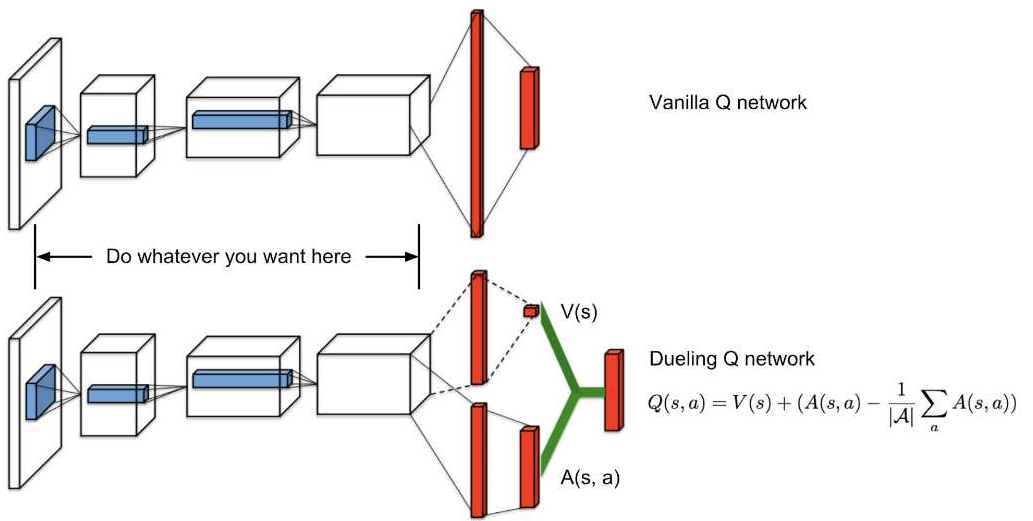

https://theaisummer.com/static/b0f4c8c3f3a5158b5899aa52575eaea0/95a07/DDQN.jpg

# Test Mountain Car Environment with OpenAI Gym

In [87]:
import gym 
import random
import matplotlib.pyplot as plt

In [65]:
# open env from gym

env_names = ["CartPole-v0",
             "MountainCar-v0",
             "MountainCarContinuous-v0",
             "Pendulum-v1",
             "Acrobot-v1"]
env = gym.make(env_names[4])




states = env.observation_space.shape[0]
actions = env.action_space.n

In [88]:
actions

3

In [89]:

states

6

In [90]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    
env.close()

Episode:1 Score:-500.0
Episode:2 Score:-500.0
Episode:3 Score:-500.0
Episode:4 Score:-500.0
Episode:5 Score:-500.0


# Create a Deep Learning Model 

In [69]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [70]:
del model

In [71]:
def build_model(states, actions):

    model = tf.keras.Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [72]:
model = build_model(states, actions)

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 195       
Total params: 4,803
Trainable params: 4,803
Non-trainable params: 0
_________________________________________________________________


# Build Agent 

In [74]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from tensorflow.python.framework.ops import disable_eager_execution

In [75]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=100000, window_length=1)
   ##Dueling DQN with parameters
    
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
    nb_actions=actions, 
   # processor=processor,
    nb_steps_warmup=50,
    gamma=.99, 
    target_model_update=100,
    #train_interval=4,
    #delta_clip=1.,
    enable_dueling_network=True,
    dueling_type='avg'
)
    return dqn

In [76]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mse'])
dqn.fit(env, nb_steps=100000, visualize=False, verbose=1)

Training for 100000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 120s 12ms/step - reward: -0.9971
35 episodes - episode_reward: -284.171 [-500.000, -133.000] - loss: 0.540 - mse: 574.024 - mean_q: -26.440

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 123s 12ms/step - reward: -0.9949
51 episodes - episode_reward: -193.725 [-456.000, -114.000] - loss: 0.751 - mse: 1005.911 - mean_q: -36.141

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 125s 12ms/step - reward: -0.9938
62 episodes - episode_reward: -159.484 [-283.000, -99.000] - loss: 0.731 - mse: 1046.818 - mean_q: -36.548

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 126s 13ms/step - reward: -0.9940
60 episodes - episode_reward: -164.767 [-257.000, -111.000] - loss: 0.721 - mse: 998.141 - mean_q: -35.603

Interval 5 (40000 steps performed)
10000/10000 [==============================] -

In [91]:
scores = dqn.test(env, nb_episodes=10, visualize=True)
print(np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...
Episode 1: reward: -84.000, steps: 85
Episode 2: reward: -70.000, steps: 71
Episode 3: reward: -94.000, steps: 95
Episode 4: reward: -71.000, steps: 72
Episode 5: reward: -70.000, steps: 71
Episode 6: reward: -70.000, steps: 71
Episode 7: reward: -112.000, steps: 113
Episode 8: reward: -92.000, steps: 93
Episode 9: reward: -95.000, steps: 96
Episode 10: reward: -94.000, steps: 95
-85.2


In [92]:
env.close()

# Reloading Agent from Memory

In [79]:
dqn.save_weights('dueling_dqn_weights.h5f', overwrite=True)

In [80]:
dqn.load_weights('dueling_dqn_weights.h5f')

# Plot the reward over episodes

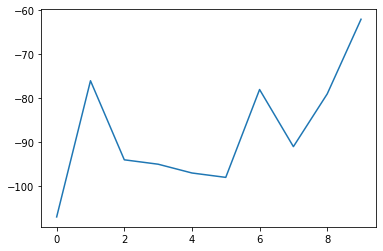

In [86]:


plt.plot(scores.history['episode_reward'])

plt.show()